## Reading and Plotting News Article Data

In [2]:
import pandas as pd
news=pd.read_csv('OnlineNewsPopularity.csv')

print(news.head())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

###### Natural Language Processing (NLP):
NLP is a relatively new field concerned with using computer science and mathematical algorithms to analyze, generate, and translate natural human language in a way that’s quick and automatic and doesn’t require human effort.
- “This column contains a measure of each article’s overall sentiment, ranging from –1 (highly negative) to 0 (neutral) to 1 (highly positive). 
- The ability to automatically measure the sentiment of text written in natural human language is one of the recent, exciting developments in the world of NLP. 
    - The most advanced sentiment analysis algorithms are able to closely match humans’ sentiment ratings, so an article about death, horror, and sadness will be ranked by both humans and NLP algorithms as having a highly negative sentiment (close to –1), while an article about joy, freedom, and data analysis will be universally agreed to have a highly positive sentiment (close to 1).”

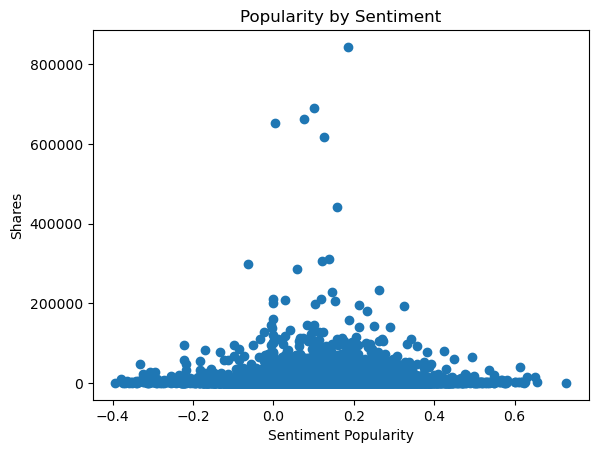

In [6]:
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Popularity')
plt.ylabel('Shares')
plt.show()

## Using Linear Regression as a Prediction Model

In [7]:
from sklearn.linear_model import LinearRegression
x = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

[[499.34840588]]
[3335.80329021]


shares=3335.8+499.3*sentiment

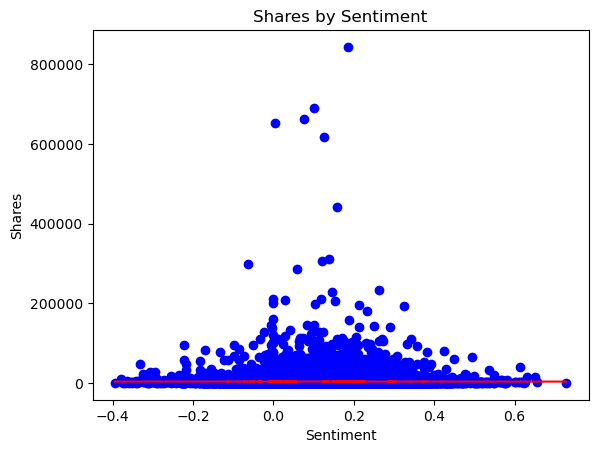

In [8]:
regline=regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'],color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline,'r')
plt.title('Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

## Understanding Supervised Learning

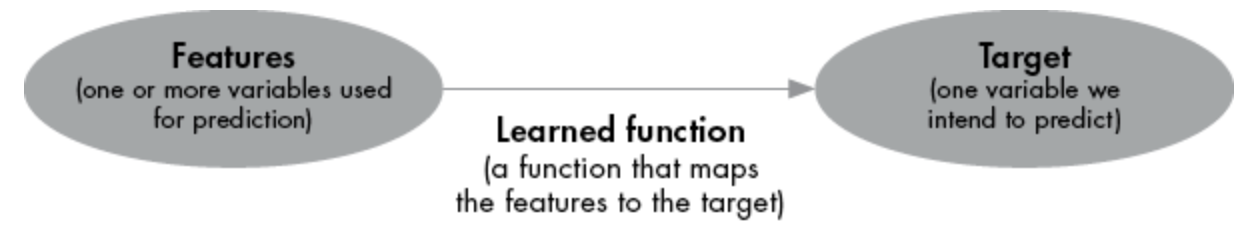

Learned Function: shares=3335.8+499.3*sentiment

Supervised Learning refers to the process of determining(learning) this function. The target variable is what supervises the process.

Feature engineering - carefully selecting which variables in our dataset will lead to the most accurate possible predictions.

Learned Function: target=intercept + coefficient1*feature1 + coefficient2*feature2 + ... + coefficientn*featuren

## k-Nearest Neighbors

"Similiar feature values lead to similiar target values."

We can measure the distance between any two observations in our dataset.
- Observations that have a small distance between them can be called neighbors.

###### k-nearest neighbors (k-NN)
    (1) Choose a point p you want to make a prediction about for a target variable
    (2) Choose a natural number, k.
    (3) Find the nearest neighbors to point p in your dataset.
    (4) The mean target value of the k nearest neighbors is the prediction for the target value of p.

In [9]:
# Implementing k-NN

k=15
newsentiment=0.5

allsentiment=news[' global_sentiment_polarity'].tolist()
allshares=news[' shares'].tolist()

distances=[abs(x-newsentiment) for x in allsentiment]
# uses list comprehension to calculate the absolute value of the difference between the sentiment of each existing 
# article and the sentiment of our new article

In [10]:
import numpy as np
idx=np.argsort(distances)
# argsort() sorts the distances list from the smallest to largest, then provides the indices of the k smallest distances

print(idx[0:k])

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


In [11]:
nearbyshares=[allshares[i] for i in idx[0:k]]
print(np.mean(nearbyshares))

7344.466666666666


Interpretation: Past articles with sentiment equal to about 0.5 get about 7,344 social media shares, on average.

In [12]:
# Performing k-NN with Python's sklearn

from sklearn.neighbors import KNeighborsRegressor
x=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

knnregressor=KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(x,y)

print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


“While linear regression implicitly expresses a model of the world in which all variables can be related to each other by lines, k-NN implicitly expresses a model of the world in which neighborhoods of points are all similar to each other”

## Using Other Supervised Learning Algorithms

In [14]:
# supervised learning with five methods

#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(regressor.predict(np.array([newsentiment]).reshape(1,-1)))

#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(dtregressor.predict(np.array([newsentiment]).reshape(1,-1)))

#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(rfregressor.predict(np.array([newsentiment]).reshape(1,-1)))

#neural network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(nnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

# structure:
# Import the package.
# Define a "regressor."
# Fit the refgressor to our data.
# Use the fitted regressor to print a prediction.

[3585.47749315]
[7344.46666667]
[3978.70776621]
[5060.40224964]
[3966.10997505]


/Users/ShreenidhiAyinala/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Decision Trees

Decision trees assume that the relationships among variables can be best expressed as a tree that consists of binary splits

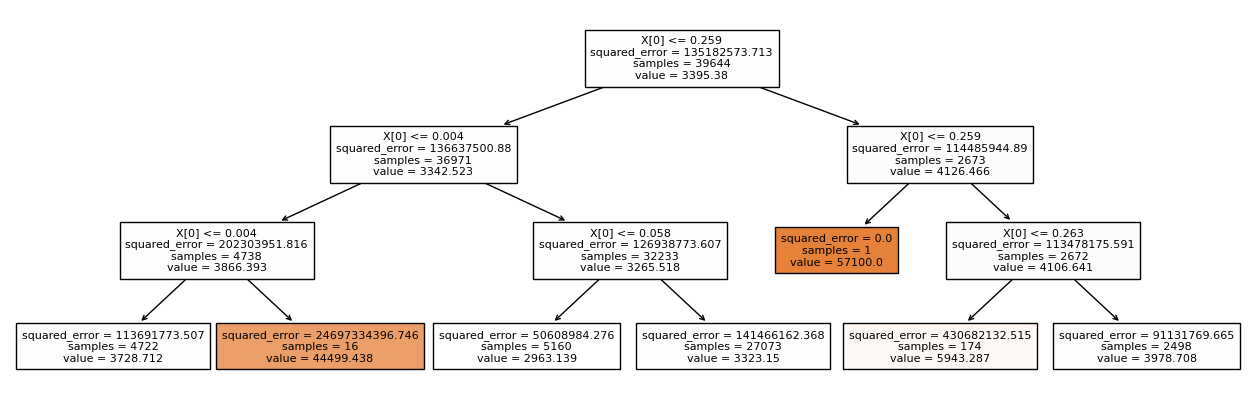

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.savefig('decisiontree.png')

If that condition is true, we proceed along the leftward arrow to a box on the next lowest level. <br>
Otherwise, we proceed along the rightward arrow to the other side of the tree.

The level of shading applied is proportional to the value predicted by the decision tree.

Decision trees are interpretable models, however, they have lower accuracy than more complex methods.

Decision trees do not assume that the variables are related by line (the assumption of linear regression) or that the variables are related by small neighborhoods around points (the assumption of k-NN).

##### Random Forests

Random forests are a type of ensemble method because they consist of collections of many simpler decision trees.
- Every time you use a random forest regressor for prediction, the sklearn code creates many decision tree regressors. Each of the individual decision tree regressors is created with a different subset of the training data and a different subset of the training features.

Random forests often have better accuracy than decision trees or linear regressions. However, they can't be easily represented like a decision tree.

##### Neural Networks

Neural networks are very complex, but are very popular.
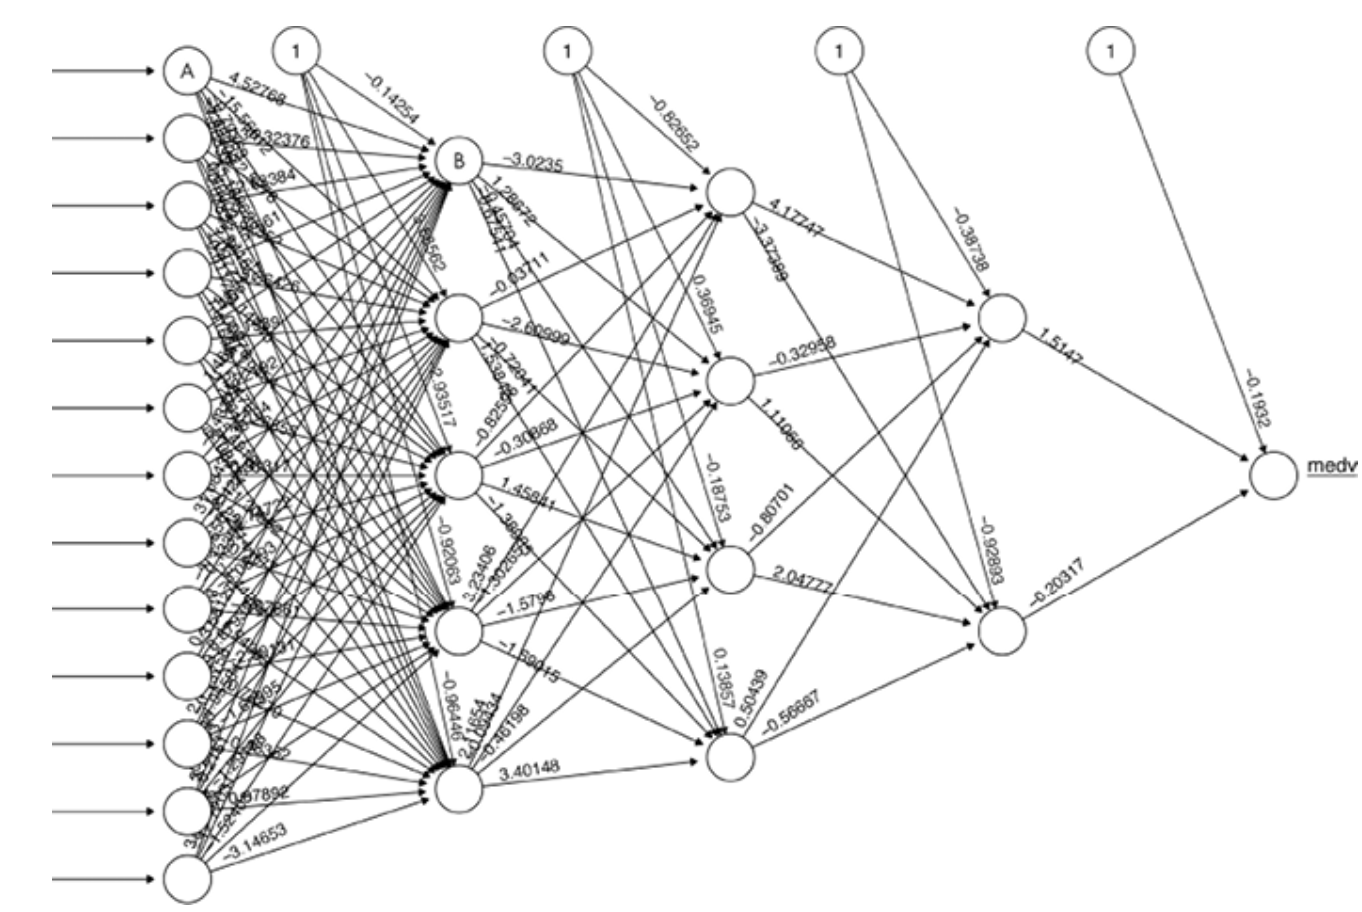

13 circles on the left side= nodes
- These 13 nodes are collectively called the input layer
    - Each node of the input layer represents one feature of the training data.
    - The single node on the far right represents the neural network's final prediction of a target variable.
    - All of the lines and nodes between the left and right represent a complex learned function that maps feature inputs to the final target prediction.

Number=weight
- Multiply weight by the value of the feature corresponding to node A. We then add the result of that multiplication to a running total that corresponds to node B
- Each feature will be multiplied by a different weight, and the product of the feature value and the weight will be added to the running total for node B.

Apply a new function called the activation function

For each of those arrows, we’ll have to follow the same steps of multiplying weights by node values, adding to running totals for every node, and applying activation functions. 

After we do this for all the nodes and all the arrows in the diagram, we’ll have a final value for the rightmost node: this will be our prediction of the target value.

Deep neural networks have many layers between the leftmost input nodes and the rightmost output. <br>
Convolutional neural networks add an extra type of layer that performs a special operation called convolution to the network structure. <br>
Recurrent neural networks allow connections to flow in multiple directions, instead of just from left to right.

## Measuring Prediction Accuracy

In [16]:
allprediction=regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror)) # calculates MAE
# a measurement of how well our particular supervised learning method performed, where 0 is the best possible value, 
# and higher values are worse.

3395.26087436506


The issue with this approach is it doesn't resemble a true prediction scenario.

Postdiction—saying what happened after it happened instead of before. 
- When we do postdiction, we’re liable to be guilty of overfitting

To avoid postdiction, split dataset into two mutually exclusive subsets, a training set and a test set.

In [17]:
from sklearn.model_selection import train_test_split
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

In [18]:
print(len(trainingx))
print(len(trainingy))
# 75% of data

29733
29733


In [19]:
print(len(testx))
print(len(testy))
# 25% of data

9911
9911


Important: For time-series data (data recorded at regular, ordered intervals), we choose training and test sets based on a split between earlier and later data, but for all other datasets, we select training and test sets randomly.

In [30]:
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [31]:
print(np.mean(predictionerror))

3816.4741523079983


In [32]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [33]:
print(np.mean(predictionerror))

3610.3084048027445


In [35]:
# k-NN has better performance than random forests
# choose the model with the lowest prediction error on a test set

## Working with Multivariate Models

In [36]:
# use multiple features to predict a target
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [38]:
print(np.mean(predictionerror))
# multivariate model performs better than univariate model

3474.431322312199


## Using Classification Instead of Regression

In [40]:
# We may be interested only in whether an article will reach a number of shares that’s higher than the median number. 
# Deciding whether something is above or below a median is a classification scenario, since it consists of deciding 
# true/false to a question with only two possible answers.”

themedian=np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)

In [41]:
# performing classification instead of regression
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)

/Users/ShreenidhiAyinala/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))

[[2833 2150]
 [2539 2389]]


2,703 true-positive classifications: Our model predicted above-median shares for 2,703 articles, and those articles did have above-median shares.

2,280 false positives: Predictions of above-median shares for articles that instead had below-median shares. 

2,370 false negatives: Predictions for below-median shares for articles that instead had above-median shares.

2,558 true negatives: Predictions of below-median shares for articles that did have below-median shares.

In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(testy,predicted)
recall = recall_score(testy,predicted)

print(precision)
print(recall)
# not encouraging values; both should be as close to 1 as possible

0.5263273848865389
0.48478084415584416
